<a href="https://colab.research.google.com/github/olusegunajibola/WQU/blob/main/ML_Sub3_Group15_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 Data Importing and Selection

### 1.1 From the previous assignment, re-import the data from the csv file

In [ ]:
import pandas as pd
import scipy.stats as st
import numpy as np
import tensorflow.compat.v1 as tf
import IPython.display
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
tf.disable_eager_execution()

import statsmodels.api as sm
from statsmodels.tsa.statespace.varmax import VARMAX
from scipy.stats import multivariate_normal


import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.facecolor'] = "0.92"

import warnings
warnings.filterwarnings("ignore")



In [ ]:
pip install statsmodels==0.12.2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/MyDrive/Colab Files/WQU_MLiF/GWP_3')
!ls

Mounted at /content/gdrive
 ML_Sub3_Group15.ipynb	       'MScFE 650 MLF GWP 3 - VARMA and NN.xlsx'
'ML_Sub3_Group15 v1.1.ipynb'   'MScFE 650 MLF GWP Data.csv'
'ML_Sub3_Group15 v1.2.ipynb'    References.gdoc
 ML_Sub3_Group15v2_Yash.ipynb


In [ ]:
data_df = pd.read_csv(r'MScFE 650 MLF GWP Data.csv',index_col = 0)
data_df.info()
data_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1-Jan-16 to 23-Oct-20
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LUXXX                   252 non-null    float64
 1   MSCI ARGENTINA          252 non-null    float64
 2   BLP ORIENTE MEDIO       252 non-null    float64
 3   MSCI AUSTRALIA          252 non-null    float64
 4   MSCI AUSTRIA            252 non-null    float64
 5   MSCI BELGIUM            252 non-null    float64
 6   MSCI BRAZIL             252 non-null    float64
 7   MSCI CANADA             252 non-null    float64
 8   MSCI CHINA              252 non-null    float64
 9   MSCI DENMARK            252 non-null    float64
 10  MSCI EM ASIA            252 non-null    float64
 11  MSCI EM EU-MIDE-AFRICA  252 non-null    float64
 12  MSCI EM EUROPE          252 non-null    float64
 13  MSCI EM LATIN AMERICA   252 non-null    float64
 14  MSCI FINLAND            252 non-nu

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,...,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,...,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,...,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
25%,1320.741000,1773.735000,2730.897500,1125.265000,102.820000,86.830000,1589.772500,1901.960000,66.552500,7912.862500,...,2509.495000,1224.482500,536.347500,1478.917525,1295.695000,99.715000,11769.345000,1131.110000,1937.375000,2242.712500
50%,1491.081000,2541.975000,3113.414050,1177.375000,130.635000,95.015000,1860.960000,1990.630000,78.710000,8227.805000,...,2795.265000,1555.135000,594.125000,1666.280000,1351.055000,109.280000,12526.645000,1194.815000,2081.695000,2559.080000
75%,1656.015500,3138.222500,3460.390000,1241.797500,146.950000,100.512500,2116.162500,2076.865000,86.532500,8554.552500,...,2985.502500,1692.932500,643.987500,1728.582500,1403.500000,114.397500,12975.560000,1299.405000,2146.630000,2777.425000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,...,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


In [ ]:
data_df.shape

(252, 35)

### 1.2 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  Choose the same one that your group used in the previous assignment.

LUXXX has been chosen as response variable.

In [ ]:
#Function for calculation returns
def cal_returns(df):
    cols = df.columns
    for col in cols:
        df["{}_return".format(col)] = np.log(df[col]) - np.log(df[col].shift())
    return df

In [ ]:
# Dataframe with returns
data_df_returns = data_df.copy(deep=True)
data_df_returns = cal_returns(data_df_returns)
col_levels = [col for col in data_df_returns.columns if '_return' not in col]
col_returns= [col for col in data_df_returns.columns if '_return' in col]
return_df = data_df_returns[col_returns].describe()
return_df

,LUXXX_return,MSCI ARGENTINA_return,BLP ORIENTE MEDIO_return,MSCI AUSTRALIA_return,MSCI AUSTRIA_return,MSCI BELGIUM_return,MSCI BRAZIL_return,MSCI CANADA_return,MSCI CHINA_return,MSCI DENMARK_return,...,MSCI NORWAY_return,MSCI PERU_return,MSCI RUSSIA_return,MSCI SINGAPORE_return,MSCI SOUTH AFRICA_return,MSCI SPAIN_return,MSCI SWEDEN_return,MSCI SWITZERLAND_return,MSCI UK_return,MSCI USA_return
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,...,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.000969,-0.001529,-0.001905,0.000465,-0.000690,-0.001837,0.001416,0.000810,0.002209,0.001176,...,0.000391,0.001614,0.001245,-0.000408,0.000157,-0.001121,0.001044,0.000607,-0.000406,0.002167
std,0.033902,0.061593,0.032287,0.022594,0.035819,0.030967,0.049242,0.021916,0.029173,0.024903,...,0.023719,0.035268,0.037766,0.022898,0.028897,0.031052,0.025913,0.021231,0.023456,0.025309
min,-0.185268,-0.490850,-0.191301,-0.145352,-0.257746,-0.219236,-0.245052,-0.159025,-0.105417,-0.148418,...,-0.160825,-0.201141,-0.245219,-0.128316,-0.158254,-0.237035,-0.175007,-0.149311,-0.188514,-0.162979
25%,-0.017340,-0.027055,-0.012580,-0.009046,-0.017700,-0.013780,-0.028255,-0.006171,-0.012678,-0.008383,...,-0.010729,-0.017379,-0.017680,-0.011139,-0.013932,-0.017751,-0.012137,-0.007939,-0.010379,-0.005664
50%,0.000280,0.001163,-0.000495,0.002231,0.000000,0.000700,0.004161,0.002841,0.004286,0.004874,...,0.002109,0.003728,0.006391,0.000868,-0.000071,0.000773,0.002458,0.002687,0.001718,0.003924
75%,0.017535,0.029597,0.010301,0.012364,0.019283,0.013157,0.028854,0.011272,0.021784,0.015249,...,0.013248,0.019954,0.024387,0.010762,0.015926,0.016868,0.015230,0.013133,0.010710,0.014306
max,0.112696,0.188822,0.141532,0.058716,0.135880,0.103359,0.225706,0.085129,0.075151,0.056608,...,0.066001,0.153086,0.105024,0.086587,0.081076,0.104094,0.063586,0.046484,0.073517,0.116717


### 2 Measuring skewness




#### 2.1 Calculate the skewness of each return series

In [ ]:
data_df = pd.read_csv(r'MScFE 650 MLF GWP Data.csv')
data_df = data_df.set_index("Date")
data_df.index = pd.to_datetime(data_df.index)
data_returns = data_df/data_df.shift(1)
data_returns = data_returns.dropna()
data_df_skewness = data_returns.skew()
data_df_skewness

LUXXX                    -0.377199
MSCI ARGENTINA           -1.558165
BLP ORIENTE MEDIO        -0.383367
MSCI AUSTRALIA           -1.591912
MSCI AUSTRIA             -0.865684
MSCI BELGIUM             -1.695599
MSCI BRAZIL               0.142589
MSCI CANADA              -2.363478
MSCI CHINA               -0.402967
MSCI DENMARK             -1.373932
MSCI EM ASIA             -0.606767
MSCI EM EU-MIDE-AFRICA   -0.954112
MSCI EM EUROPE           -1.601282
MSCI EM LATIN AMERICA    -0.516197
MSCI FINLAND             -1.711737
MSCI FRANCE              -1.648456
MSCI GERMANY             -1.506593
MSCI HONG KONG           -0.274383
MSCI INDIA               -0.277847
MSCI ITALY               -1.755134
MSCI JAPAN               -0.454980
MSCI KOREA               -0.732136
MSCI MEXICO              -0.779074
MSCI NETHERLANDS         -1.688612
MSCI NEW ZEALAND         -0.774727
MSCI NORWAY              -1.358375
MSCI PERU                -0.301576
MSCI RUSSIA              -1.130974
MSCI SINGAPORE      

The above gives us negative values, and this imply that all the return series are skewed to the left.

### 2.2 Calculate the difference between the mean and the median for each series

In [ ]:
diff_data_df = data_df.mean()-data_df.median()
diff_data_df

LUXXX                     -33.849095
MSCI ARGENTINA            -15.322738
BLP ORIENTE MEDIO         -83.931072
MSCI AUSTRALIA              6.565159
MSCI AUSTRIA               -3.216111
MSCI BELGIUM               -3.724762
MSCI BRAZIL               -46.970833
MSCI CANADA               -19.808373
MSCI CHINA                 -1.921786
MSCI DENMARK              219.852738
MSCI EM ASIA               -7.896944
MSCI EM EU-MIDE-AFRICA     -4.086091
MSCI EM EUROPE             -2.345357
MSCI EM LATIN AMERICA     -96.492262
MSCI FINLAND               -2.194722
MSCI FRANCE                -2.164524
MSCI GERMANY               -1.122103
MSCI HONG KONG           -125.678849
MSCI INDIA                -43.322024
MSCI ITALY                 -0.160873
MSCI JAPAN                 -9.907857
MSCI KOREA                 -2.258095
MSCI MEXICO               -73.685000
MSCI NETHERLANDS           -1.686825
MSCI NEW ZEALAND           10.054444
MSCI NORWAY               -74.667817
MSCI PERU                 -94.627183
M

From the above, all except MSCI RUSSIA and MSCI NEW ZEALAND returned a negative result. This shows that the timeseries, excluding the exception noted are skewed to the left.

### 2.3 How do the skewness and the (mean-median) difference compare?


In [ ]:
comp_skew_diff = abs(data_df_skewness)-abs(diff_data_df)
comp_skew_diff

LUXXX                     -33.471896
MSCI ARGENTINA            -13.764573
BLP ORIENTE MEDIO         -83.547705
MSCI AUSTRALIA             -4.973247
MSCI AUSTRIA               -2.350427
MSCI BELGIUM               -2.029163
MSCI BRAZIL               -46.828245
MSCI CANADA               -17.444895
MSCI CHINA                 -1.518818
MSCI DENMARK             -218.478806
MSCI EM ASIA               -7.290177
MSCI EM EU-MIDE-AFRICA     -3.131979
MSCI EM EUROPE             -0.744075
MSCI EM LATIN AMERICA     -95.976065
MSCI FINLAND               -0.482985
MSCI FRANCE                -0.516068
MSCI GERMANY                0.384489
MSCI HONG KONG           -125.404466
MSCI INDIA                -43.044177
MSCI ITALY                  1.594261
MSCI JAPAN                 -9.452877
MSCI KOREA                 -1.525959
MSCI MEXICO               -72.905926
MSCI NETHERLANDS            0.001787
MSCI NEW ZEALAND           -9.279717
MSCI NORWAY               -73.309442
MSCI PERU                 -94.325606
M

Skewness is significantly higher than difference of mean and median which indicate that the returns are not symmetrical although the mean/ medians values are close to each other.

### 3 Structural Breaks and Kurtosis

#### 3.1 Calculate the kurtosis for your response return series

In [ ]:
kurtosis_data_df = data_returns.kurtosis()
kurtosis_data_df

LUXXX                      3.673164
MSCI ARGENTINA             9.979312
BLP ORIENTE MEDIO          8.558636
MSCI AUSTRALIA             8.386086
MSCI AUSTRIA               8.300975
MSCI BELGIUM              11.210002
MSCI BRAZIL                4.955046
MSCI CANADA               17.126114
MSCI CHINA                 0.503073
MSCI DENMARK               5.419496
MSCI EM ASIA               1.805496
MSCI EM EU-MIDE-AFRICA     6.216364
MSCI EM EUROPE             9.410206
MSCI EM LATIN AMERICA      5.863212
MSCI FINLAND              12.089493
MSCI FRANCE               12.775617
MSCI GERMANY              11.999360
MSCI HONG KONG             2.211644
MSCI INDIA                 6.868704
MSCI ITALY                12.741930
MSCI JAPAN                 5.752759
MSCI KOREA                 4.672002
MSCI MEXICO                3.925753
MSCI NETHERLANDS          10.327415
MSCI NEW ZEALAND           5.590298
MSCI NORWAY                8.107998
MSCI PERU                  5.007732
MSCI RUSSIA                5

#### 3.2 Run a threshold regression model to identify at least 1 regime shift.

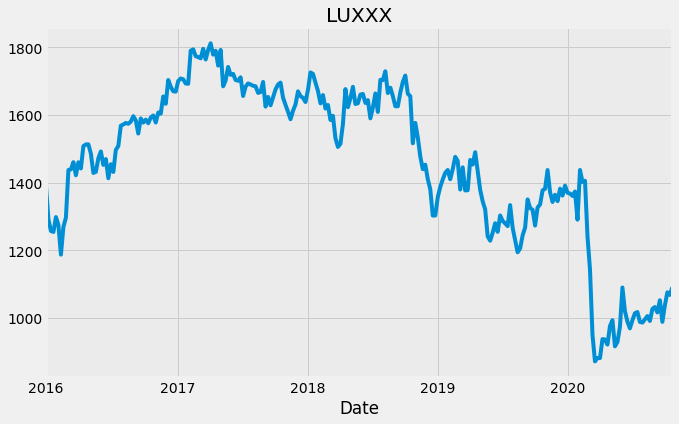

In [ ]:
data_df["LUXXX"].plot(title = 'LUXXX')

In [ ]:
markov_auto_regression = sm.tsa.MarkovRegression(
    data_df["LUXXX"], k_regimes=2
)
res = markov_auto_regression.fit()
print(res.summary())

                        Markov Switching Model Results                        
Dep. Variable:                  LUXXX   No. Observations:                  252
Model:               MarkovRegression   Log Likelihood               -1629.403
Date:                Mon, 18 Apr 2022   AIC                           3268.806
Time:                        22:41:29   BIC                           3286.454
Sample:                    01-01-2016   HQIC                          3275.907
                         - 10-23-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.6616     27.422     36.418      0.000     944.916    1052.408
                             Regime 1 parameters    

From the summary output, the mean LUXXX MSCI in the first regime (the “low regime”) is estimated to be **998.66** whereas in the “high regime” it is **1530.65**. Below we plot the smoothed probabilities of the regimes. 

In [ ]:
res.expected_durations

array([112.0014886, 290.0110601])

In [ ]:
res.regime_transition

array([[[0.99107155],
        [0.00344814]],

       [[0.00892845],
        [0.99655186]]])

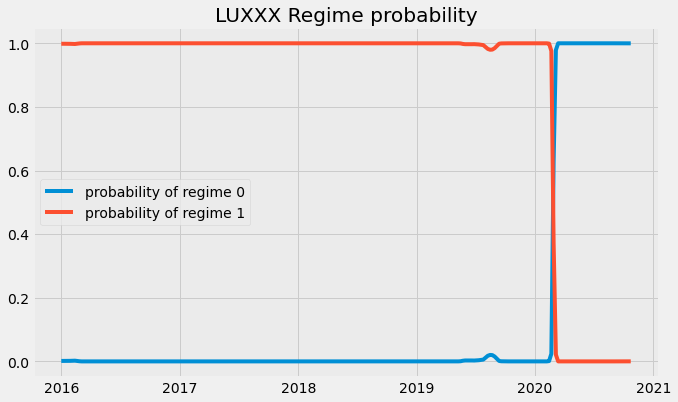

In [ ]:
plt.plot(res.smoothed_marginal_probabilities[0], label="probability of regime 0")
plt.plot(res.smoothed_marginal_probabilities[1], label="probability of regime 1")
plt.title("LUXXX Regime probability")
plt.legend()
plt.show()

#### 3.3 Calculate the standard deviation of the return series for each regime.

In [ ]:
expected_regime =  (res.smoothed_marginal_probabilities[1] > res.smoothed_marginal_probabilities[0]).astype(int)
expected_regime = expected_regime[1:]
expected_regime.name = "Regime"
ret = data_df["LUXXX"].pct_change()[1:]
ret.name = "Return"
ret_data = pd.DataFrame([expected_regime, ret]).T

print("Regime std")
print(ret_data.groupby(['Regime'])['Return'].std())

Regime std
Regime
0.0    0.055273
1.0    0.028661
Name: Return, dtype: float64


#### 3.4 Fit a Bivariate Normal Distribution BN(mean1, standard deviation1, mean2, standard deviation2, mixing parameter).  For simplicity, you can assume the means are the same.

In [ ]:
# We assume LUXXX and MSCI USA mean as same
joined_data = pd.DataFrame([data_df["LUXXX"], data_df["MSCI USA"]]).T

joined_data.cov()
joined_data.mean()
var = multivariate_normal(mean=joined_data.mean(), cov=joined_data.cov())

Text(0.5, 0, 'PDF')

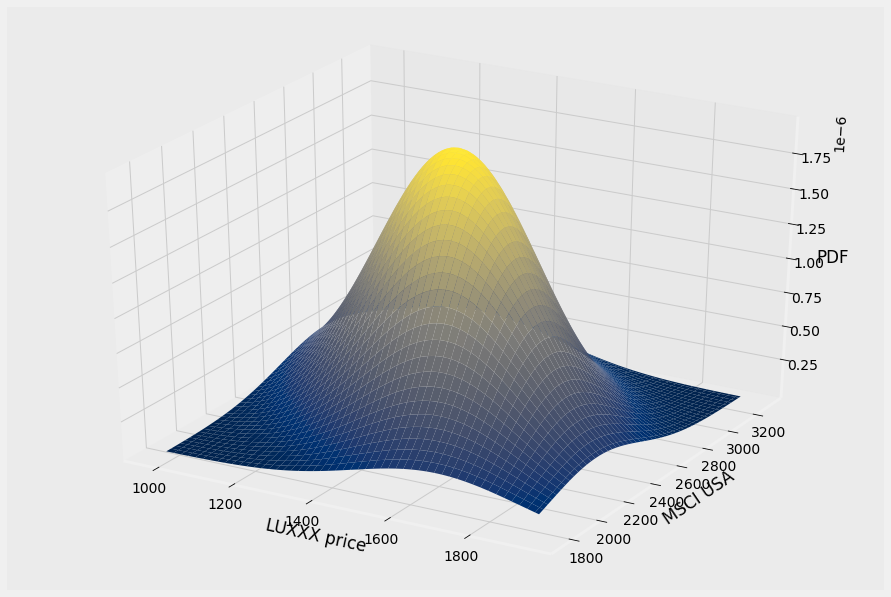

In [ ]:
fig = plt.figure(figsize = (14,10))
ax = plt.axes(projection='3d')

mean_0 = joined_data.mean()["LUXXX"]
std_0 = np.sqrt(joined_data.cov()["LUXXX"]["LUXXX"])
mean_1 = joined_data.mean()["MSCI USA"]
std_1 = np.sqrt(joined_data.cov()["MSCI USA"]["MSCI USA"])


x = np.linspace(mean_0-2*std_0, mean_0+2*std_0, 100)
y = np.linspace(mean_1-2*std_1, mean_1+2*std_1, 100)

X, Y = np.meshgrid(x, y)
Z = []
for x_cur in x:
    for y_cur in y:
        cur_var = var.pdf([x_cur, y_cur])
        Z.append(cur_var)

Z = np.array(Z)
Z.resize(len(x), len(y))
Z
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel('LUXXX price')
ax.set_ylabel('MSCI USA')
ax.set_zlabel('PDF')

### 4 Visualizing Distributions

#### 4.1 Use your response variable that you ran a regime shift model.  Show the following graphs in side-by-side panels.  Keep the scales of the 2 graphs the same!

Response variable was LUXXX .


#### 4.2 Plot histograms for each return series.  Superimpose a density plot on top.

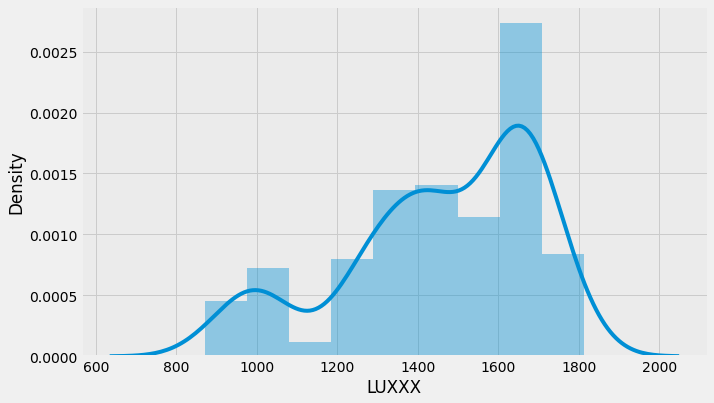

In [ ]:
sns.distplot(a=data_df["LUXXX"])

plt.show()

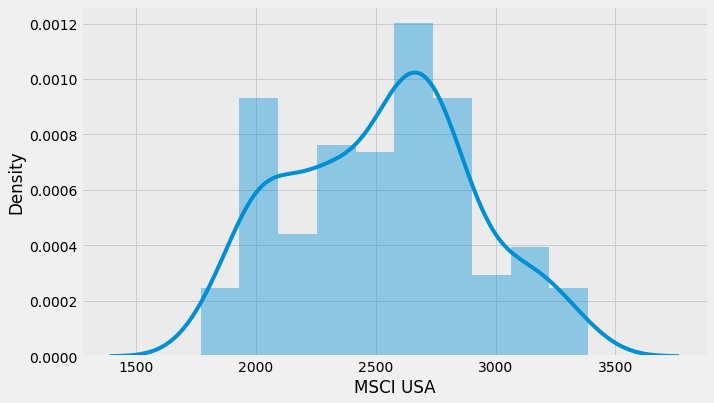

In [ ]:
sns.distplot(a=data_df["MSCI USA"])

plt.show()

#### 4.3 Plot a qqplot for each return series.  Superimpose the points on the plot

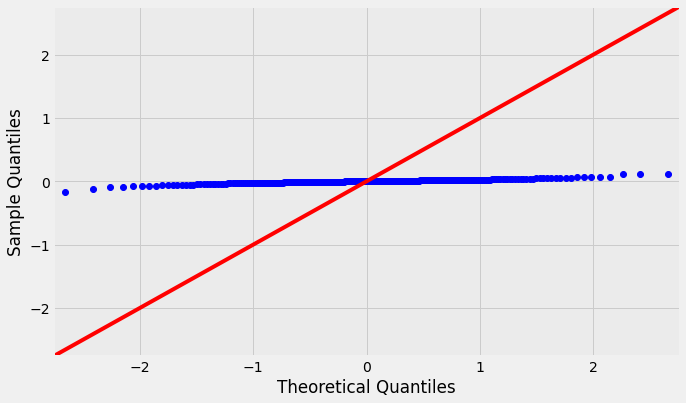

In [ ]:
import pylab as py
sm.qqplot(data_df["LUXXX"].pct_change()[1:], line ='45')
py.show()

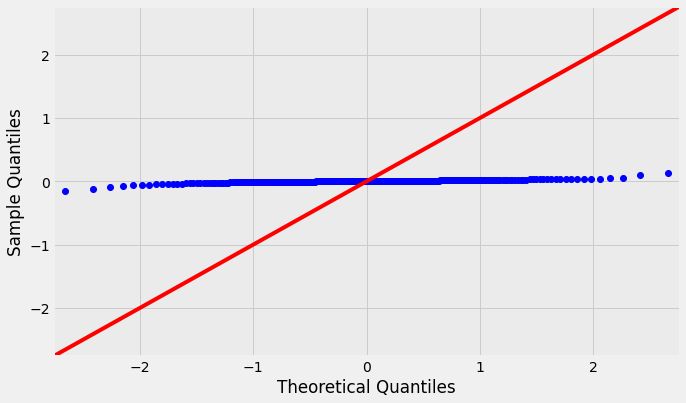

In [ ]:
sm.qqplot(data_df['MSCI USA'].pct_change()[1:], line ='45')
py.show()

### 5 Outliers

### 5.1 Using a combination of calculated stats and visuals, identify the outliers.

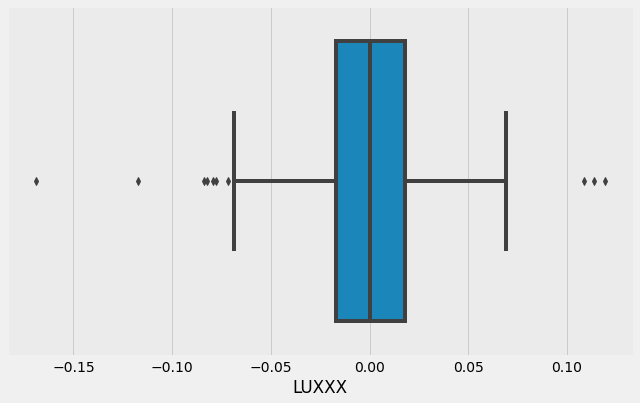

In [ ]:
data_pct_change_luxxx = data_df["LUXXX"].pct_change()[1:]
sns.boxplot(data_pct_change_luxxx)

plt.show()

In [ ]:
data_std = data_pct_change_luxxx.std()
data_mean = data_pct_change_luxxx.mean()
outliers_luxxx = data_pct_change_luxxx[data_pct_change_luxxx> data_mean + 2*data_std].append(data_pct_change_luxxx[data_pct_change_luxxx < data_mean - 2*data_std])
outliers_luxxx

Date
2016-02-19    0.069134
2016-03-04    0.108592
2020-02-07    0.113842
2020-06-05    0.119292
2016-01-08   -0.071509
2016-02-12   -0.068617
2018-10-26   -0.083995
2020-02-28   -0.117117
2020-03-06   -0.079100
2020-03-13   -0.169119
2020-03-20   -0.082232
2020-05-15   -0.077948
Name: LUXXX, dtype: float64

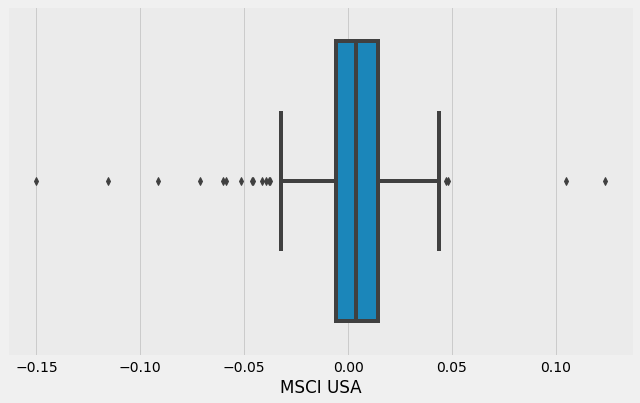

In [ ]:
data_pct_change_usa = data_df["MSCI USA"].pct_change()[1:]
sns.boxplot(data_pct_change_usa)

plt.show()

In [ ]:
data_std = data_pct_change_usa.std()
data_mean = data_pct_change_usa.mean()
outliers_usa = data_pct_change_usa[data_pct_change_usa > data_mean + 2*data_std].append(data_pct_change_usa[data_pct_change_usa < data_mean - 2*data_std])
outliers_usa

Date
2020-03-27    0.104848
2020-04-10    0.123801
2016-01-08   -0.060430
2018-02-09   -0.051478
2018-03-23   -0.058954
2018-12-21   -0.071100
2020-02-28   -0.115563
2020-03-13   -0.091303
2020-03-20   -0.150391
Name: MSCI USA, dtype: float64

### 5.2 What is a monotone transformation?

A monotonic transformation is a way of transforming one set of numbers into another set of numbers in a way that the order of the numbers is preserved.

### 5.3 Is there a monotone transformation of the data that can help handle the outliers better?  If so, perform it.

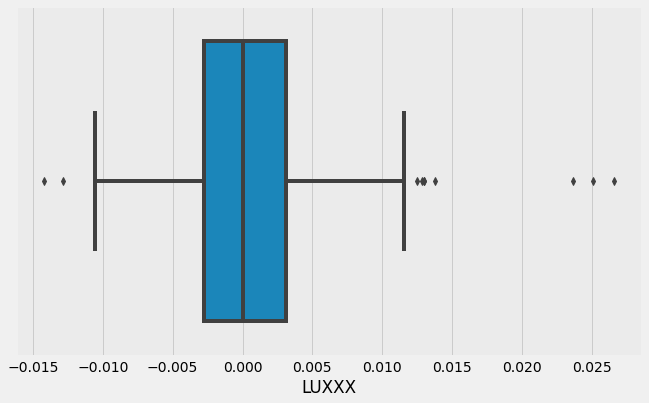

In [ ]:
min_ret_luxxx = -min(data_df["LUXXX"].pct_change()[1:])

transformed_data = np.square((data_df["LUXXX"].pct_change()[1:] + min_ret_luxxx)) - np.square(min_ret_luxxx)

min_ret_luxxx = -min(transformed_data)
transformed_data = np.sqrt(transformed_data +min_ret_luxxx + 1) - np.sqrt(min_ret_luxxx + 1)
sns.boxplot(transformed_data)
plt.show()

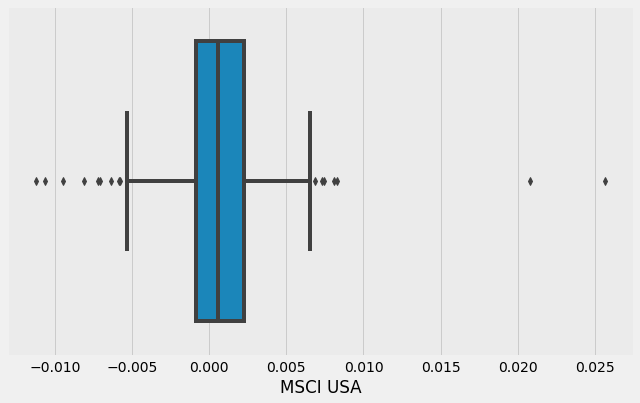

In [ ]:
min_ret_usa = -min(data_df["MSCI USA"].pct_change()[1:])

transformed_data = np.square((data_df["MSCI USA"].pct_change()[1:] + min_ret_usa)) - np.square(min_ret_usa)

min_ret_usa = -min(transformed_data)
transformed_data = np.sqrt(transformed_data +min_ret_usa + 1) - np.sqrt(min_ret_usa + 1)
sns.boxplot(transformed_data)
plt.show()

### 6 Compare unsupervised and supervised methods of learning

#### 6.1 Is the neural network methodology supervised or unsupervised?  Explain.


The neural network methodology is a supervised form of learning. This is because the training data is labelled and it informs the selection of the parameters of the model (i.e., the weights and the biases)

### 7 Vector Auto-Regressive Moving Average (VARMA)

#### 7.1 Run an VARMA model, which models your response (e.g. LUXXX) versus lagged versions of itself AND with some number of exogeneous variables (e.g. the other ETFs).

In [ ]:
y = pd.DataFrame(data_df["LUXXX"])
x = pd.concat([pd.DataFrame(data_df.iloc[:, 1]), data_df.iloc[:, 2:]], axis=1)

In [ ]:
y


,LUXXX
Date,
2016-01-01,1390.716
2016-01-08,1291.267
2016-01-15,1257.086
2016-01-22,1254.167
2016-01-29,1298.240
...,...
2020-09-25,988.345
2020-10-02,1037.211
2020-10-09,1075.670


In [ ]:
x

,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,403.66,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
2016-01-08,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,377.65,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2016-01-15,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,363.18,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
2016-01-22,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,363.10,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
2016-01-29,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,374.07,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,1450.64,2252.2500,1166.97,84.95,64.63,1424.53,2018.62,94.77,11122.05,586.97,...,2570.43,1162.66,554.53,1328.1400,1238.65,78.45,14099.14,1362.07,1641.51,3191.72
2020-10-02,1506.32,2265.7000,1128.45,84.89,66.00,1365.07,2031.76,97.19,11389.27,601.70,...,2587.30,1172.45,543.08,1344.0300,1276.25,79.97,14355.01,1368.78,1658.14,3243.91
2020-10-09,1617.45,2214.3200,1187.29,90.01,69.35,1447.85,2076.53,101.03,11779.71,625.29,...,2635.08,1212.32,553.32,1358.9700,1291.47,82.44,14602.91,1375.90,1687.56,3370.62


In [ ]:
model = Lasso(alpha=0.1)
model.fit(x, y)

tuples = []
for i,v in enumerate(model.coef_):
    tuples.append((i, v))


# choose the 7 most important predictiors by the coefficient
tuples.sort(key = lambda x: abs(x[1]), reverse=True)

topPredictors = pd.DataFrame()
for i in range(0,7):
    curSer = x.iloc[:, tuples[i][0]]
    topPredictors[curSer.name] = curSer
    
topPredictors

,MSCI ITALY,MSCI SPAIN,MSCI GERMANY,MSCI NETHERLANDS,MSCI BELGIUM,MSCI FRANCE,MSCI AUSTRIA
Date,,,,,,,
2016-01-01,61.26,108.40,140.65,120.08,105.38,131.10,106.70
2016-01-08,56.94,101.00,129.12,112.38,99.35,122.85,97.66
2016-01-15,54.86,97.34,125.17,110.37,97.32,119.45,93.54
2016-01-22,54.36,99.21,128.08,114.75,100.73,123.00,95.79
2016-01-29,53.16,100.06,128.32,117.19,103.05,125.61,96.93
...,...,...,...,...,...,...,...
2020-09-25,48.90,78.45,140.60,163.96,64.63,137.63,84.95
2020-10-02,49.52,79.97,143.29,169.19,66.00,140.51,84.89
2020-10-09,50.76,82.44,147.24,173.03,69.35,144.34,90.01


In [ ]:
# concat the x and y
def get_data(topPredictors, y):
    x_varma = pd.concat([topPredictors, y], axis=1)
    
    x_varma = x_varma.iloc[:, :]
    # removal of first element so we preict the future results
    y_varma = pd.concat([y.iloc[:, :], topPredictors.iloc[:, 0]], axis=1)
    y_varma.index = x_varma.index
    # range(0,len(y_varma))
    
    
    
    # computing pct change for stationarity
    x_varma_pct = x_varma.pct_change()[1:]
    y_varma_pct = y_varma.pct_change()[1:]
    return x_varma_pct, y_varma_pct

x_varma_pct, y_varma_pct = get_data(topPredictors, y)

In [ ]:
x_varma_pct

,MSCI ITALY,MSCI SPAIN,MSCI GERMANY,MSCI NETHERLANDS,MSCI BELGIUM,MSCI FRANCE,MSCI AUSTRIA,LUXXX
Date,,,,,,,,
2016-01-08,-0.070519,-0.068266,-0.081977,-0.064124,-0.057221,-0.062929,-0.084724,-0.071509
2016-01-15,-0.036530,-0.036238,-0.030592,-0.017886,-0.020433,-0.027676,-0.042187,-0.026471
2016-01-22,-0.009114,0.019211,0.023248,0.039685,0.035039,0.029720,0.024054,-0.002322
2016-01-29,-0.022075,0.008568,0.001874,0.021264,0.023032,0.021220,0.011901,0.035141
2016-02-05,-0.076561,-0.034679,-0.050421,-0.050516,-0.066181,-0.045936,-0.025998,-0.018185
...,...,...,...,...,...,...,...,...
2020-09-25,-0.040236,-0.041188,-0.045421,-0.015551,-0.057185,-0.048597,-0.053482,-0.060663
2020-10-02,0.012679,0.019375,0.019132,0.031898,0.021198,0.020926,-0.000706,0.049442
2020-10-09,0.025040,0.030887,0.027566,0.022696,0.050758,0.027258,0.060313,0.037079


In [ ]:
# x_varma_pct.iloc[:,:-1]
y_varma_pct.iloc[:,0]

Date
2016-01-08   -0.071509
2016-01-15   -0.026471
2016-01-22   -0.002322
2016-01-29    0.035141
2016-02-05   -0.018185
                ...   
2020-09-25   -0.060663
2020-10-02    0.049442
2020-10-09    0.037079
2020-10-16   -0.007048
2020-10-23    0.021051
Name: LUXXX, Length: 251, dtype: float64

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
def optimize_VARMA(endog, parameters_list):
    """
        Returns a dataframe with parameters (p,d) and corresponding MSE
        
        endog - the observed variable
        parameters_list - list of (p,q) tuples
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try:
            model = sm.tsa.VARMAX(endog, order=param).fit(disp=False)
        except:
            continue
    
        mse = model.mse
        results.append([param, mse])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'mse']
    
    result_df = result_df.sort_values(by='mse', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
# endog = data_df[['LUXXX','MSCI ITALY']]
exog = x_varma_pct.iloc[:,:-1]
endog = y_varma_pct
p = range(0, 6, 1)
q = range(0, 5, 1)

parameters = product(p, q)
parameters_list = list(parameters)

result_df_VARMA = optimize_VARMA(endog, parameters_list)
result_df_VARMA

  0%|          | 0/30 [00:00<?, ?it/s]

,"(p,q)",mse
0,"(5, 4)",0.001951
1,"(3, 4)",0.001953
2,"(4, 3)",0.001953
3,"(5, 3)",0.001953
4,"(5, 2)",0.001954
5,"(5, 0)",0.001954
6,"(5, 1)",0.001955
7,"(3, 3)",0.001959
8,"(4, 4)",0.001962
9,"(4, 2)",0.001962


In [ ]:
best_model_VARMA = sm.tsa.VARMAX(endog, order=(3,4), trend = 'n')
res_VARMA = best_model_VARMA.fit(maxiter = 1000, disp=False)
print(res_VARMA.summary())

                              Statespace Model Results                             
Dep. Variable:     ['LUXXX', 'MSCI ITALY']   No. Observations:                  251
Model:                          VARMA(3,4)   Log Likelihood                1101.255
Date:                     Mon, 18 Apr 2022   AIC                          -2140.510
Time:                             22:51:56   BIC                          -2031.221
Sample:                         01-08-2016   HQIC                         -2096.530
                              - 10-23-2020                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.94, 0.03   Jarque-Bera (JB):        113.97, 18.62
Prob(Q):                        0.33, 0.87   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.50, 0.89   Skew:                     -0.36, -0.47
Prob(H) (two-sided):            0.00, 0.60   Kurtosis:                   6.2

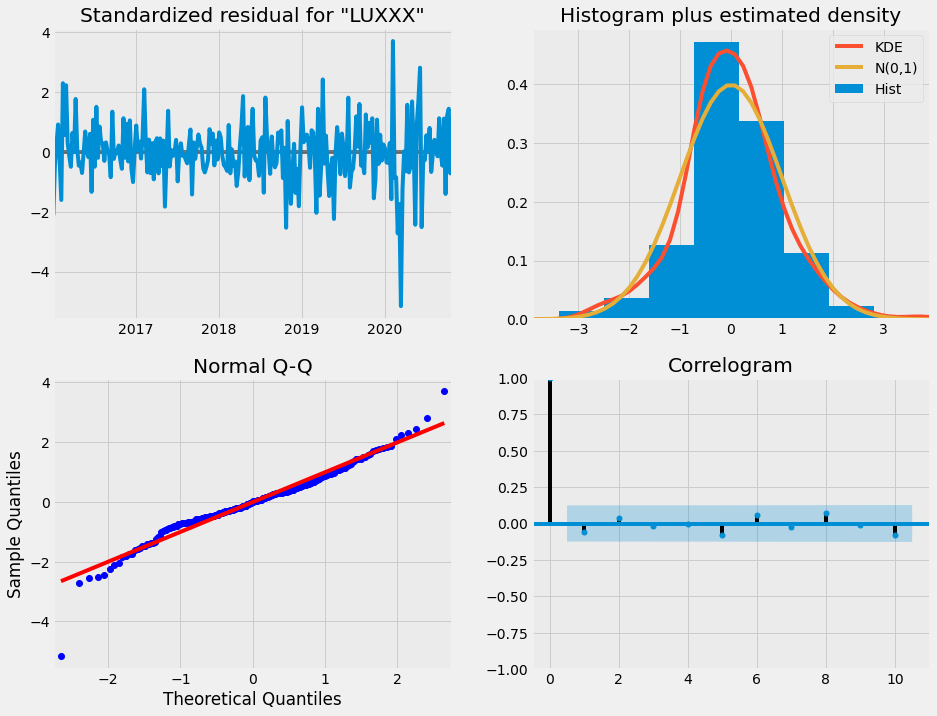

In [ ]:
res_VARMA.plot_diagnostics(figsize= (14,11));

#### 7.2 What is the difference between how we ran LASSO (GWP #1) and the VARMA?  (Hint: think about time subscripts)

The lasso regression only takes into account the current exogenous variables to predict the current endogenous variable where as the VARMA has memory and takes into account the previous exogenous values.

#### 7.3 Find a different set of variables that works BETTER than the original LASSO regression.  Show a statistical measure to justify its improved performance.

In [ ]:
endog = data_df[['LUXXX','MSCI BRAZIL']].pct_change()
endog = endog.dropna(axis = 0)
endog

,LUXXX,MSCI BRAZIL
Date,,
2016-01-08,-0.071509,-0.081275
2016-01-15,-0.026471,-0.049758
2016-01-22,-0.002322,-0.028155
2016-01-29,0.035141,0.090767
2016-02-05,-0.018185,0.024631
...,...,...
2020-09-25,-0.060663,-0.064895
2020-10-02,0.049442,-0.041740
2020-10-09,0.037079,0.060642


In [ ]:
p = range(0, 5, 1)
q = range(0, 4, 1)

parameters = product(p, q)
parameters_list = list(parameters)

result_df_VARMA = optimize_VARMA(endog, parameters_list)
result_df_VARMA

  0%|          | 0/20 [00:00<?, ?it/s]

,"(p,q)",mse
0,"(4, 3)",0.003285
1,"(4, 1)",0.003290
2,"(4, 2)",0.003290
3,"(4, 0)",0.003291
4,"(3, 2)",0.003308
5,"(3, 1)",0.003309
6,"(3, 3)",0.003317
7,"(1, 3)",0.003322
8,"(2, 3)",0.003324
9,"(2, 2)",0.003328


In [ ]:
best_model_VARMA = VARMAX(endog, order=(1,3))
res_VARMA = best_model_VARMA.fit(disp=False)
print(res_VARMA.summary())

                              Statespace Model Results                              
Dep. Variable:     ['LUXXX', 'MSCI BRAZIL']   No. Observations:                  252
Model:                           VARMA(1,3)   Log Likelihood               -2734.943
                                + intercept   AIC                           5511.886
Date:                      Mon, 18 Apr 2022   BIC                           5586.004
Time:                              22:53:29   HQIC                          5541.709
Sample:                          01-01-2016                                         
                               - 10-23-2020                                         
Covariance Type:                        opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):          30.66, 9.19
Prob(Q):                        0.95, 0.98   Prob(JB):                   0.00, 0.01
Heteroskedasticity (H):         1.70, 1.44   Skew:                 

The updated variables result in a lower JB value. This indicates that the residuals are more normally distributed, impyling that our model captures more of the underlying data distribution.

### 8 Neural Networks

#### 8.1 Perform a Neural Network, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable number of layers, basing your result on cross-validation.

In [ ]:
y = data_returns["LUXXX"]>1
y

Date
2016-01-08    False
2016-01-15    False
2016-01-22    False
2016-01-29     True
2016-02-05    False
              ...  
2020-09-25    False
2020-10-02     True
2020-10-09     True
2020-10-16    False
2020-10-23     True
Name: LUXXX, Length: 251, dtype: bool

In [ ]:
chosen_vars = ['MSCI ITALY', 'MSCI SPAIN', 'MSCI GERMANY', 'MSCI NETHERLANDS', 'MSCI BELGIUM', 'MSCI FRANCE', 'MSCI AUSTRIA']

X = data_returns[chosen_vars]
X_other = pd.concat([data_returns["LUXXX"].shift(1), data_returns["LUXXX"].shift(2)], axis=1)
X= pd.concat([X, X_other], axis=1)

X.columns = ['MSCI ITALY', 'MSCI SPAIN', 'MSCI GERMANY', 'MSCI NETHERLANDS', 'MSCI BELGIUM', 'MSCI FRANCE', 'MSCI AUSTRIA', 'LUXXX-1', 'LUXXX-2']


y = y.iloc[2:]
X = X.iloc[2:]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle=False )
X_train.head()

,MSCI ITALY,MSCI SPAIN,MSCI GERMANY,MSCI NETHERLANDS,MSCI BELGIUM,MSCI FRANCE,MSCI AUSTRIA,LUXXX-1,LUXXX-2
Date,,,,,,,,,
2016-01-22,0.990886,1.019211,1.023248,1.039685,1.035039,1.029720,1.024054,0.973529,0.928491
2016-01-29,0.977925,1.008568,1.001874,1.021264,1.023032,1.021220,1.011901,0.997678,0.973529
2016-02-05,0.923439,0.965321,0.949579,0.949484,0.933819,0.954064,0.974002,1.035141,0.997678
2016-02-12,0.961907,0.931981,0.964465,0.943201,0.965188,0.949516,0.969283,0.981815,1.035141
2016-02-19,1.016730,1.031215,1.047992,1.051929,1.028854,1.056508,1.043820,0.931383,0.981815


In [ ]:
X_test.head()

,MSCI ITALY,MSCI SPAIN,MSCI GERMANY,MSCI NETHERLANDS,MSCI BELGIUM,MSCI FRANCE,MSCI AUSTRIA,LUXXX-1,LUXXX-2
Date,,,,,,,,,
15-Nov-19,0.999844,0.981129,0.999869,1.004678,1.010683,1.007445,0.981917,1.040148,1.003380
22-Nov-19,0.983891,1.001832,0.995945,0.989901,0.991791,0.992668,0.993356,0.954629,1.040148
29-Nov-19,0.997934,1.007862,1.006632,1.007819,1.006349,1.002777,0.979862,0.978724,0.954629
06-Dec-19,0.995381,1.002268,0.995238,1.007455,1.003605,0.994402,1.001632,1.015852,0.978724
13-Dec-19,1.005281,1.017015,1.009242,1.006197,0.992479,1.006637,1.004519,0.986143,1.015852


In [ ]:
assigned_group = tf.feature_column.sequence_categorical_column_with_identity('Return', 2)

inputFunction = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=1000,shuffle=True)

In [ ]:
featureColumns = list(X_train.columns)
features = {}

for col in featureColumns:
    features[col] = tf.feature_column.numeric_column(col)
    
feature_columns = features.keys()

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(10)])
model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
metrics = ['accuracy'])

In [ ]:
X_train_array = X_train.values
y_train_array = y_train.values.astype(int)
model.fit(X_train_array, y_train_array, epochs = 40)

Train on 199 samples
Epoch 1/40
199/199 [==============================] - 2s 11ms/sample - loss: 2.4707 - accuracy: 0.0000e+00
Epoch 2/40
199/199 [==============================] - 0s 90us/sample - loss: 1.9642 - accuracy: 0.4020
Epoch 3/40
199/199 [==============================] - 0s 75us/sample - loss: 1.5799 - accuracy: 0.4824
Epoch 4/40
199/199 [==============================] - 0s 74us/sample - loss: 1.2943 - accuracy: 0.4824
Epoch 5/40
199/199 [==============================] - 0s 77us/sample - loss: 1.0856 - accuracy: 0.4824
Epoch 6/40
199/199 [==============================] - 0s 74us/sample - loss: 0.9395 - accuracy: 0.4824
Epoch 7/40
199/199 [==============================] - 0s 74us/sample - loss: 0.8501 - accuracy: 0.5327
Epoch 8/40
199/199 [==============================] - 0s 75us/sample - loss: 0.8020 - accuracy: 0.5176
Epoch 9/40
199/199 [==============================] - 0s 74us/sample - loss: 0.7718 - accuracy: 0.5176
Epoch 10/40
199/199 [===========================

In [ ]:
X_test_array = X_test.values
y_test_array = y_test.values.astype(int)

test_loss, test_acc = model.evaluate(X_test_array, y_test_array, verbose=2)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.6984893584251404
Test accuracy: 0.48


#### 8.2 Run a Regression Neural Network.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable number of layers, basing your result on cross-validation.

In [ ]:
y_reg = data_returns["LUXXX"].iloc[2:]
y_reg.shape[0]

249

In [ ]:
y_train_reg =y_reg.iloc[:199]
y_test_reg = y_reg.iloc[199:]

In [ ]:
import tensorflow as tf_new

y_train_reg_array = y_train_reg.values
y_test_reg_array = y_test_reg.values

model_reg = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'relu'),tf.keras.layers.Dense(128, activation = 'relu'),tf.keras.layers.Dense(10)])
model_reg.compile(optimizer= tf_new.optimizers.Adam(learning_rate=0.0001), loss = 'mean_absolute_error',metrics = ['accuracy'])

model_reg.fit(X_train_array, y_train_reg_array, epochs = 400)

Train on 199 samples
Epoch 1/400
199/199 [==============================] - 0s 2ms/sample - loss: 1.0438 - accuracy: 0.0000e+00
Epoch 2/400
199/199 [==============================] - 0s 84us/sample - loss: 0.9950 - accuracy: 0.0000e+00
Epoch 3/400
199/199 [==============================] - 0s 84us/sample - loss: 0.9477 - accuracy: 0.0000e+00
Epoch 4/400
199/199 [==============================] - 0s 81us/sample - loss: 0.9009 - accuracy: 0.0000e+00
Epoch 5/400
199/199 [==============================] - 0s 84us/sample - loss: 0.8539 - accuracy: 0.0000e+00
Epoch 6/400
199/199 [==============================] - 0s 82us/sample - loss: 0.8062 - accuracy: 0.0000e+00
Epoch 7/400
199/199 [==============================] - 0s 82us/sample - loss: 0.7588 - accuracy: 0.0000e+00
Epoch 8/400
199/199 [==============================] - 0s 80us/sample - loss: 0.7116 - accuracy: 0.0000e+00
Epoch 9/400
199/199 [==============================] - 0s 82us/sample - loss: 0.6632 - accuracy: 0.0000e+00
Epoch 10

In [ ]:
y_train_reg_array.shape

(199,)

In [ ]:
X_train_array.shape

(199, 9)

In [ ]:
test_loss, test_acc = model_reg.evaluate(X_test_array, y_test_reg_array, verbose=2)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.022219406738877297
Test accuracy: 0.0


#### 8.3 Which performed better, the classification or the regression network?

Accuracy is higher for classification model than the regression model. 